# Fantastic Tool Review Analysis
**Description:** This analysis analyzes the themes and sentiment of the reviews for a new BI tool called Fantastic Tool.<br>
**Author:** Shane Butler <br>
**Last Modified:** 2024-09-10


### Analysis Prompt
At Ontra, we are considering replacing our BI tool. In order to evaluate various tools, we are interested in what other users think. With that in mind, we have created a fake data set of 100 reviews for a new BI tool called Fantastic Tool.

In the attached CSV, you have 100 reviews associated with Fantastic Tool could you:

Tell us what the main themes across these reviews are?

Please share in detail your approach and why you chose this approach to answer the question
What is the sentiment of the reviews, and based on that, would you recommend we choose this tool?

Again, please share how you approached this analysis, and why you chose this approach?
What are the limitations of your analysis? What, if anything, is preventing you from providing more complete answers (dataset/time restrictions/context of our choice)?

### Set Up Environment

In [179]:
# !pip install pandas
# !pip install scikit-learn
# !pip install seaborn
# !pip install matplotlib
# !pip install nltk


  Using cached scipy-1.13.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 14.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 16.5 MB/s eta 0:00:00m eta 0:00:010:0101
Using cached scipy-1.13.1-cp311-cp311-macosx_12_0_arm64.whl (30.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [1]:
# import libaries
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

### Get Data

In [3]:
df = pd.read_csv('Fantastic Tool Reviews.csv')

### Initial EDA

In [4]:
df.head()

,Review number,Headline,Review
0,1,Fantastic Tool review,It gives me a overall performance report for t...
1,2,The Power of Extreme in the Cloud,Fantastic Tool is easy to connect to an existi...
2,3,Fantastic Tool accelerates data insights,support is super helpful and it appeals to a w...
3,4,Michelin Star Analytics,Where to start? Fantastic Tool Computing is a...
4,5,Fantastic Tool Usage Review,"Home Dashboard View and Navigation, it was int..."


In [5]:
df.shape

(100, 3)

In [6]:
# check for dups
df.duplicated().sum()

0

In [7]:
# check for nulls
df.isnull().sum()

Review number    0
Headline         0
Review           0
dtype: int64

In [8]:
# fix col name
df.rename(columns={'Review ':'Review'}, inplace=True)

### Prepare Data

In [18]:
# Preprocess and vectorize headlines and reviews

# List of custom words to remove, like 'fantastic' and 'tool'
custom_stopwords = ['fantastic', 'tool', 'data', 'bi']
# Add built-in English stopwords
all_stopwords = list(text.ENGLISH_STOP_WORDS.union(custom_stopwords))

# Combine headline and review into full text
df['full_text'] = df['Headline'] + ' ' + df['Review']

# vectorizer = CountVectorizer(stop_words='english') #bag of words
vectorizer = TfidfVectorizer(stop_words=all_stopwords, max_df=0.8, ngram_range=(1, 2)) #tf-idf, max freq at 80%
X = vectorizer.fit_transform(df['full_text'])

Number of topics: 2, Perplexity: 11008.661646993305
Number of topics: 3, Perplexity: 19798.78590162673
Number of topics: 4, Perplexity: 33364.2018998001
Number of topics: 5, Perplexity: 53786.98415294008
Number of topics: 6, Perplexity: 84771.0507355203
Number of topics: 7, Perplexity: 130246.7949645065
Number of topics: 8, Perplexity: 192959.17037689986
Number of topics: 9, Perplexity: 285724.977550661


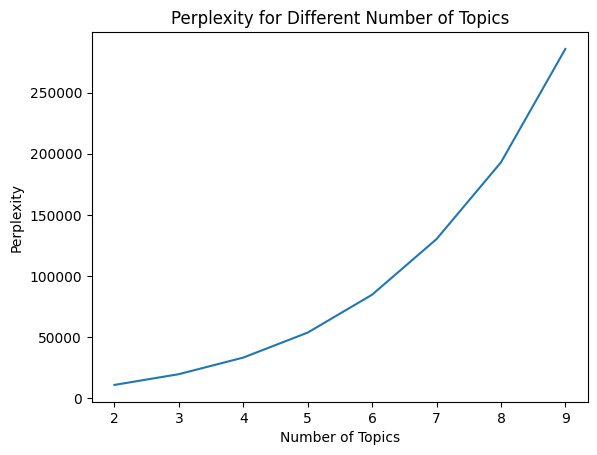

In [19]:
# Identify number of topics using perplexity (likelihood of the words given the model's topics)

# get function to compute perplexity for a given number of topics
def compute_perplexity(num_topics, X):
    lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=100, random_state=42)
    lda_model.fit(X)
    perplexity = lda_model.perplexity(X)
    return perplexity

# Init
perplexity_values = []
topic_range = range(2, 10)  # Test topic numbers from 2 to 10

# Loop over topic range and calc perplexity
for num_topics in topic_range:
    perplexity = compute_perplexity(num_topics, X)
    perplexity_values.append(perplexity)
    print(f"Number of topics: {num_topics}, Perplexity: {perplexity}")

# Plot perplexity values
plt.plot(topic_range, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Perplexity for Different Number of Topics")
plt.show()

# # Fit LDA Model
# lda = LatentDirichletAllocation(n_components=4, max_iter=100, random_state=42)  # experiment with number of topics
# lda.fit(X)
# # Display the top words in each topic
# terms = vectorizer.get_feature_names_out()
# topics = {}
# for idx, topic in enumerate(lda.components_):
#     top_words = [terms[i] for i in topic.argsort()[::-1][:10]]  # top 10 words for each topic
#     topics[f"Topic {idx + 1}"] = top_words
# # convert to df
# topics_df = pd.DataFrame(topics)
# print(topics_df)

perrplexity increases as topic count increases which is unusual - perplexity is expected to decrease when the model better fits the data

Number of topics: 2, Coherence Score: 0.2559
Number of topics: 3, Coherence Score: 0.2892
Number of topics: 4, Coherence Score: 0.2716
Number of topics: 5, Coherence Score: 0.3845
Number of topics: 6, Coherence Score: 0.3929
Number of topics: 7, Coherence Score: 0.3870
Number of topics: 8, Coherence Score: 0.3892
Number of topics: 9, Coherence Score: 0.3775

Best number of topics: 6 with Coherence Score: 0.3929


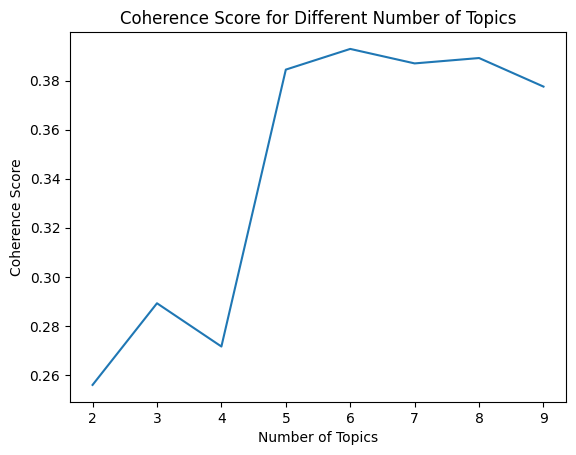

In [20]:
# Identify number of topics using coherence (how related words are to each other)

# Tokenize
texts = [text.split() for text in df['full_text']]
# get dictionary for Gensim coherence model
dictionary = Dictionary(texts)

#  get function to calculate coherence score
def compute_coherence_values(lda_model, texts, dictionary, vectorizer):
    # Get the topic-word matrix
    topics = lda_model.components_
    # Get the feature names (i.e., words) for each topic
    terms = vectorizer.get_feature_names_out()
    # Prepare topics for Gensim coherence model
    topics_terms = [[terms[i] for i in topic.argsort()[:-11:-1]] for topic in topics]
    # Gensim Coherence Model
    coherence_model_lda = CoherenceModel(topics=topics_terms, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

# Initialize variables
best_coherence = -1
best_num_topics = 0
coherence_values = []

# Loop over a range of topic numbers to find the best number
for num_topics in range(2, 10): 
    # Fit the LDA model
    lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=100, random_state=42)
    lda_model.fit(X)
    
    # Compute the coherence score
    coherence = compute_coherence_values(lda_model, texts, dictionary, vectorizer)
    coherence_values.append(coherence)
    
    # Check if this is the best model so far
    if coherence > best_coherence:
        best_coherence = coherence
        best_num_topics = num_topics
    
    print(f"Number of topics: {num_topics}, Coherence Score: {coherence:.4f}")

# Display the best number of topics
print(f"\nBest number of topics: {best_num_topics} with Coherence Score: {best_coherence:.4f}")

# Optionally, you can plot the coherence scores to visualize the best topic number
plt.plot(range(2, 10), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Number of Topics")
plt.show()


In [21]:
# Fit LDA Model
lda = LatentDirichletAllocation(n_components=5, max_iter=100, random_state=42)  # 5 topics based on coherence
lda.fit(X)
# Display the top words in each topic
terms = vectorizer.get_feature_names_out()
topics = {}
for idx, topic in enumerate(lda.components_):
    top_words = [terms[i] for i in topic.argsort()[::-1][:10]]  # top 10 words for each topic
    topics[f"Topic {idx + 1}"] = top_words
# convert to df
topics_df = pd.DataFrame(topics)
print(topics_df)

    Topic 1        Topic 2          Topic 3        Topic 4         Topic 5
0      easy           good              use           good         extreme
1       use          table          reports           team        friendly
2   support        filters             easy      different           great
3      best           load             like           easy      experience
4     great           easy         easy use          track            user
5      ease          takes             best       friendly  visualizations
6  features         graphs            using    performance          faster
7  customer       elements         powerful           user         visuals
8     build        overall           simple  user friendly   user friendly
9      fast  functionality  convenient user        helpful           users


Many of the topics talk about how it's an easy. At 5 themes we can look a bit at how they're diffent.<br>

    1: "Customer Support and Features",
    2: "Graphs, Filters, and Functionality",
    3: "Simplicity and Convenience",
    4: "Team Collaboration and Helpfulness",
    5: "Visualizations and Performance (Comparisons with Extreme)"


In [23]:
# Assign dominant topic back to the original DataFrame
topic_distribution = lda.transform(X)
topic_distribution.argmax(axis=1) + 1
# Assign the most dominant topic for each review
df['dominant_topic_id'] = topic_distribution.argmax(axis=1) + 1
# map topic ids to curated topics
topic_labels = {
    1: "Customer Support and Features",
    2: "Graphs, Filters, and Functionality",
    3: "Simplicity and Convenience",
    4: "Team Collaboration and Helpfulness",
    5: "Visualizations and Performance (Comparisons with Extreme)"
}
# Map the dominant topic number to the corresponding label using the dictionary
df['dominant_topic'] = df['dominant_topic_id'].map(topic_labels)
df.head()

,Review number,Headline,Review,full_text,dominant_topic_id,dominant_topic
0,1,Fantastic Tool review,It gives me a overall performance report for t...,Fantastic Tool review It gives me a overall pe...,2,"Graphs, Filters, and Functionality"
1,2,The Power of Extreme in the Cloud,Fantastic Tool is easy to connect to an existi...,The Power of Extreme in the Cloud Fantastic To...,2,"Graphs, Filters, and Functionality"
2,3,Fantastic Tool accelerates data insights,support is super helpful and it appeals to a w...,Fantastic Tool accelerates data insights suppo...,4,Team Collaboration and Helpfulness
3,4,Michelin Star Analytics,Where to start? Fantastic Tool Computing is a...,Michelin Star Analytics Where to start? Fanta...,2,"Graphs, Filters, and Functionality"
4,5,Fantastic Tool Usage Review,"Home Dashboard View and Navigation, it was int...",Fantastic Tool Usage Review Home Dashboard Vie...,4,Team Collaboration and Helpfulness


In [24]:
# get distibution of dominant topics accross reviews

topic_counts = df['dominant_topic'].value_counts()
topic_percentage = (topic_counts / len(df)) * 100

distribution_df = pd.DataFrame({
    'dominant_topic': topic_counts.index,
    'count': topic_counts.values,
    'percentage': topic_percentage.values
})


# Display the distribution of topics
print(distribution_df)

                                      dominant_topic  count  percentage
0                      Customer Support and Features     27        27.0
1                 Team Collaboration and Helpfulness     24        24.0
2                 Graphs, Filters, and Functionality     18        18.0
3  Visualizations and Performance (Comparisons wi...     16        16.0
4                         Simplicity and Convenience     15        15.0


/var/folders/45/8zn4j7kj4f197m91r8db1tf40000gn/T/ipykernel_29271/2191904930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='percentage', y='dominant_topic', data=distribution_df, palette='Blues_d')


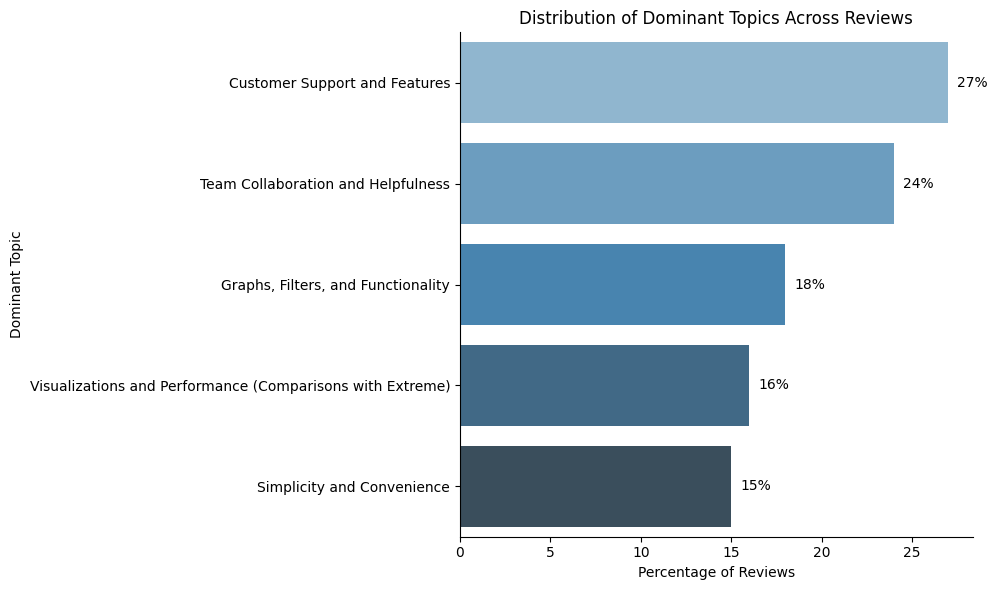

In [25]:
#plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='percentage', y='dominant_topic', data=distribution_df, palette='Blues_d')

# Add labels to each bar
for index, value in enumerate(distribution_df['percentage']):
    barplot.text(value + 0.5, index, f'{value:.0f}%', color='black', va="center")

# Add labels and title
plt.xlabel('Percentage of Reviews')
plt.ylabel('Dominant Topic')
plt.title('Distribution of Dominant Topics Across Reviews')

# Remove the borders
sns.despine()

# Display the horizontal bar chart
plt.tight_layout()
plt.show()

### Sentiment Analysis

In [28]:
# get vader lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# List of custom words to remove, like 'fantastic' and 'extreme' which relate to tool names
custom_stopwords = ['fantastic', 'extreme']
all_stopwords = list(text.ENGLISH_STOP_WORDS.union(custom_stopwords))

# Preprocess function to remove stopwords
def remove_stopwords(text):
    tokens = text.split()
    filtered_words = [word for word in tokens if word.lower() not in all_stopwords]
    return ' '.join(filtered_words)

# Remove stopwords from the 'full_text' column
df['cleaned_full_text'] = df['full_text'].apply(remove_stopwords)

# Apply sentiment analysis to the full_text (headline and review)
df['sentiment'] = df['cleaned_full_text'].apply(lambda review: sia.polarity_scores(review)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sabutler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review number,Headline,Review,full_text,dominant_topic_id,dominant_topic,sentiment,sentiment_label,cleaned_full_text
0,1,Fantastic Tool review,It gives me a overall performance report for t...,Fantastic Tool review It gives me a overall pe...,2,"Graphs, Filters, and Functionality",0.0000,Neutral,Tool review gives overall performance report e...
1,2,The Power of Extreme in the Cloud,Fantastic Tool is easy to connect to an existi...,The Power of Extreme in the Cloud Fantastic To...,2,"Graphs, Filters, and Functionality",0.8766,Positive,Power Cloud Tool easy connect existing cloud d...
2,3,Fantastic Tool accelerates data insights,support is super helpful and it appeals to a w...,Fantastic Tool accelerates data insights suppo...,4,Team Collaboration and Helpfulness,0.8555,Positive,Tool accelerates data insights support super h...
3,4,Michelin Star Analytics,Where to start? Fantastic Tool Computing is a...,Michelin Star Analytics Where to start? Fanta...,2,"Graphs, Filters, and Functionality",0.6369,Positive,Michelin Star Analytics start? Tool Computing ...
4,5,Fantastic Tool Usage Review,"Home Dashboard View and Navigation, it was int...",Fantastic Tool Usage Review Home Dashboard Vie...,4,Team Collaboration and Helpfulness,0.0258,Neutral,Tool Usage Review Home Dashboard View Navigati...


In [29]:
# get distibution of sentiment accross reviews

sentiment_counts = df['sentiment_label'].value_counts()
sentiment_percentage = (sentiment_counts / len(df)) * 100

sentiment_distribution_df = pd.DataFrame({
    'sentiment_label': sentiment_counts.index,
    'count': sentiment_counts.values,
    'percentage': sentiment_percentage.values
})


# Display the distribution of topics
print(sentiment_distribution_df)

  sentiment_label  count  percentage
0        Positive     92        92.0
1         Neutral      7         7.0
2        Negative      1         1.0


In [37]:
df.dtypes

Review number          int64
Headline              object
Review                object
full_text             object
dominant_topic_id      int64
dominant_topic        object
sentiment            float64
sentiment_label       object
cleaned_full_text     object
dtype: object

/var/folders/45/8zn4j7kj4f197m91r8db1tf40000gn/T/ipykernel_29271/541963914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='sentiment_label', data=sentiment_distribution_df, palette='Blues_d')


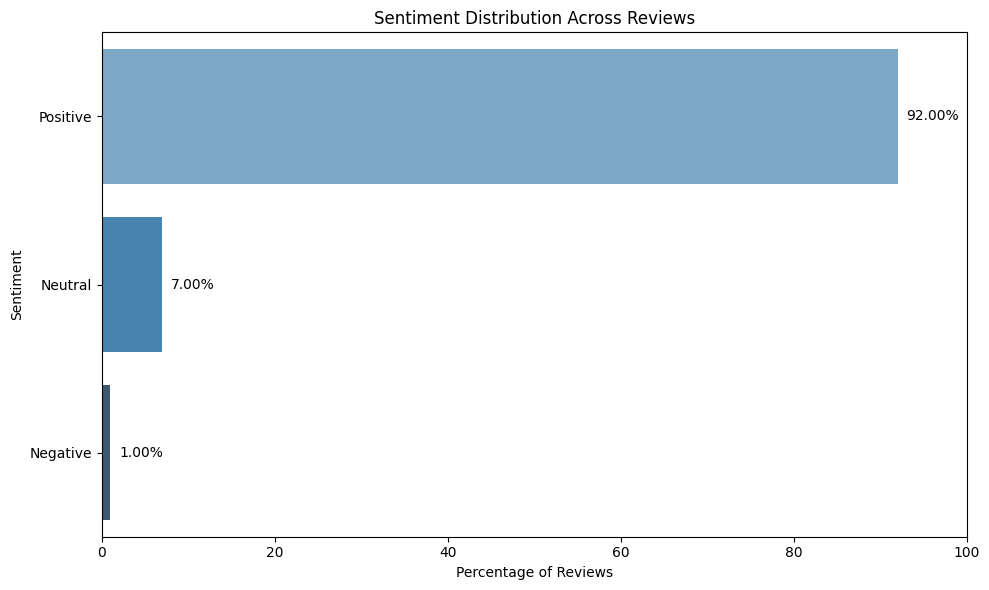

In [33]:

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='percentage', y='sentiment_label', data=sentiment_distribution_df, palette='Blues_d')

# Add labels
for index, value in enumerate(sentiment_distribution_df['percentage']):
    plt.text(value + 1, index, f"{value:.2f}%", va='center')

# Customize the plot
plt.title('Sentiment Distribution Across Reviews')
plt.xlabel('Percentage of Reviews')
plt.ylabel('Sentiment')
plt.xlim(0, 100)  # Set x-axis limit to 100%
plt.tight_layout()

# Show plot
plt.show()


In [50]:
# view top 5 sentiment
pd.set_option('display.max_colwidth', None)
top_sent = df.sort_values(by='sentiment', ascending=False).head(3)[['Headline','Review','sentiment','sentiment_label']]
top_sent

,Headline,Review,sentiment,sentiment_label
25,Business Intelligence Software Trailblazer,"Fantastic Tool Computing offers a modern approach to business intelligence that stands out in the industry. I particularly appreciate the complete control over performance provided by the cloud data warehouse live connection, materialization, and caching capabilities. Fantastic Tool's platform presents far more commercialization opportunities compared to other tools, allowing our clients to truly experience a self-service environment. The product is continuously improved with thoughtful enhancements and a forward-thinking roadmap that leverages the latest technological developments. Moreover, the in-app live support with real humans enables our analysts and developers to resolve issues swiftly and efficiently, significantly boosting our productivity. There is truly nothing that I dislike about Fantastic Tool. I would however recommend investing more in controls for formatting static reports as well. To be the ""all-in-one"" solution it must include top notch PDF and XLSX exporting functionalities, and while they do exist and are good, there is room for improvement on the export quality, specifically for margins, elements potentially being cut off due to sizing, etc...",0.9906,Positive
70,The best and possibly last BI tool you will ever need,"We evaluated quite a few BI platforms before choosing Fantastic Tool. I also have used many of the bigger names in the space. There is nothing out there like Fantastic Tool when it comes to the ease of connecting to data sources, the ability to quickly generate fully functional dashboards in a fraction of the time it takes with other tools, the amount of powerful Extreme like formulas at your fingertips, and the ability to write data back to the EDW without needing a DBA to create tables. You won't need to write SQL or Python within this tool. You could, but you probably won't. I normally prefer writing my own SQL, but with Fantastic Tool I don't miss it at all. You can perform joins and link tables with vlookup like functionality. Oh and it's very fast and can handle millions of rows of data with ease. Also their chat support is fantastic. Best all around BI tool on the market IMO. It's hard for me to find something I dislike, but I suppose their license model could be refined to delinate better between technical users and non-technical users, while providing enough functionality for the middle ground users. Make sure you understand the ins and outs of what each license can do.",0.9885,Positive
26,"Fantastic Tool is a Game Changer - Ease of Use, Great Analytics Tool","Fantastic Tool has been a game changer at for our company. Our organization still did a lot of analysis using Extreme. The organization did not want to give up use of Extreme, as they were comfortable with using it and being able to quickly manipulate data. We first introduced Fantastic Tool in early January of 2023, and ever since, it has been a game changer. People want all reports to be in Fantastic Tool, and love how intuitive and easy it is to use. We currently use PowerBi for reports and dashboards, but were limited with what data we could provide, and if there was a lot of data, the report would take a while to produce results. With Fantastic Tool, we can publish large amounts of data quickly, plus it also has some great visualizations. In less than 6 months Fantastic Tool has changed the way the organization views data, and they just can’t seem to get enough of Fantastic Tool. In addition to easy of use, and large amounts of data that it can display, the “World Class” support from Fantastic Tool make it a BI tool like no other. I wish we had started using Fantastic Tool earlier",0.9843,Positive


In [51]:
# view bottom 5 sentiment
bottom_sent = df.sort_values(by='sentiment', ascending=True).head(3)[['Headline','Review','sentiment','sentiment_label']]
bottom_sent

,Headline,Review,sentiment,sentiment_label
22,Fantastic Tool Review,"The inuitive nature of both querying and drag and drop functionality. I find the color changing actually quite annoying. Though its not a big deal, I would like a better interface to change the colors",-0.1513,Negative
0,Fantastic Tool review,It gives me a overall performance report for the entire team where i can compare indivuals performance as well as overall team performance. It allows me to take decisions accordingly to work on paramaters where individuals are lacking. Sometimes it takes time to load the data which can be improvised.,0.0000,Neutral
71,Fantastic Tool for Operational & Analytical Reporting,"All Industries run by Extreme, but when we are in the cloud, Fantastic Tool is alternative. Not yet to Savy as Extreme and should also be able to crate a Single Page Web App for Data Referential activity.",0.0000,Neutral


In [53]:
pd.concat([top_sent,bottom_sent],ignore_index=True).sort_values(by='sentiment'

,Headline,Review,sentiment,sentiment_label
0,Business Intelligence Software Trailblazer,"Fantastic Tool Computing offers a modern approach to business intelligence that stands out in the industry. I particularly appreciate the complete control over performance provided by the cloud data warehouse live connection, materialization, and caching capabilities. Fantastic Tool's platform presents far more commercialization opportunities compared to other tools, allowing our clients to truly experience a self-service environment. The product is continuously improved with thoughtful enhancements and a forward-thinking roadmap that leverages the latest technological developments. Moreover, the in-app live support with real humans enables our analysts and developers to resolve issues swiftly and efficiently, significantly boosting our productivity. There is truly nothing that I dislike about Fantastic Tool. I would however recommend investing more in controls for formatting static reports as well. To be the ""all-in-one"" solution it must include top notch PDF and XLSX exporting functionalities, and while they do exist and are good, there is room for improvement on the export quality, specifically for margins, elements potentially being cut off due to sizing, etc...",0.9906,Positive
1,The best and possibly last BI tool you will ever need,"We evaluated quite a few BI platforms before choosing Fantastic Tool. I also have used many of the bigger names in the space. There is nothing out there like Fantastic Tool when it comes to the ease of connecting to data sources, the ability to quickly generate fully functional dashboards in a fraction of the time it takes with other tools, the amount of powerful Extreme like formulas at your fingertips, and the ability to write data back to the EDW without needing a DBA to create tables. You won't need to write SQL or Python within this tool. You could, but you probably won't. I normally prefer writing my own SQL, but with Fantastic Tool I don't miss it at all. You can perform joins and link tables with vlookup like functionality. Oh and it's very fast and can handle millions of rows of data with ease. Also their chat support is fantastic. Best all around BI tool on the market IMO. It's hard for me to find something I dislike, but I suppose their license model could be refined to delinate better between technical users and non-technical users, while providing enough functionality for the middle ground users. Make sure you understand the ins and outs of what each license can do.",0.9885,Positive
2,"Fantastic Tool is a Game Changer - Ease of Use, Great Analytics Tool","Fantastic Tool has been a game changer at for our company. Our organization still did a lot of analysis using Extreme. The organization did not want to give up use of Extreme, as they were comfortable with using it and being able to quickly manipulate data. We first introduced Fantastic Tool in early January of 2023, and ever since, it has been a game changer. People want all reports to be in Fantastic Tool, and love how intuitive and easy it is to use. We currently use PowerBi for reports and dashboards, but were limited with what data we could provide, and if there was a lot of data, the report would take a while to produce results. With Fantastic Tool, we can publish large amounts of data quickly, plus it also has some great visualizations. In less than 6 months Fantastic Tool has changed the way the organization views data, and they just can’t seem to get enough of Fantastic Tool. In addition to easy of use, and large amounts of data that it can display, the “World Class” support from Fantastic Tool make it a BI tool like no other. I wish we had started using Fantastic Tool earlier",0.9843,Positive
3,Fantastic Tool Review,"The inuitive nature of both querying and drag and drop functionality. I find the color changing actually quite annoying. Though its not a big deal, I would like a better interface to change the colors",-0.1513,Negati

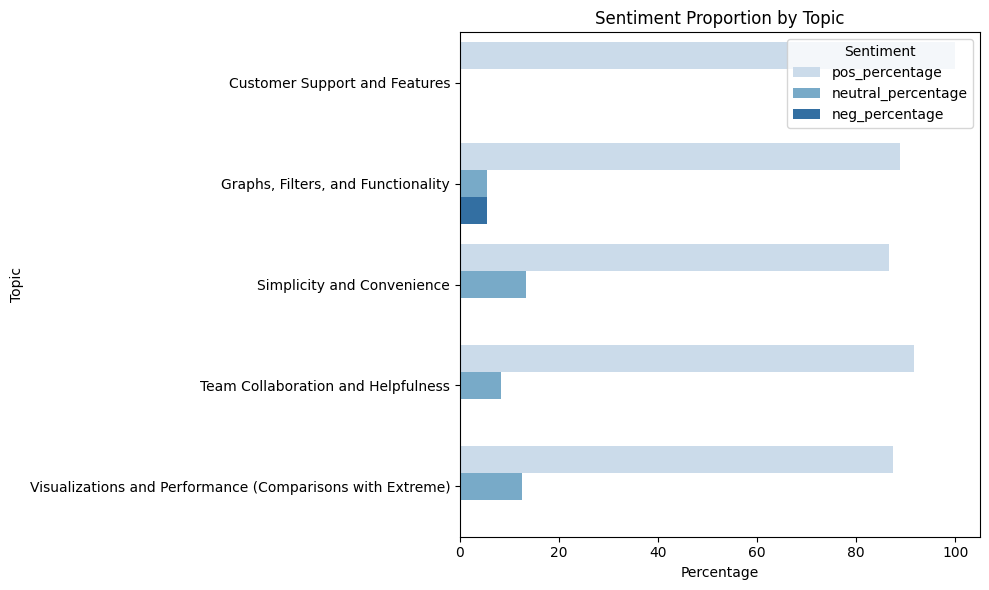

In [39]:
# plot sentiment by topic
# Group by 'dominant_topic' and calculate the average sentiment and proportion of sentiment labels
sentiment_by_topic = df.groupby('dominant_topic').agg(
    avg_sentiment=('sentiment', 'mean'),
    pos_count=('sentiment_label', lambda x: (x == 'Positive').sum()),
    neutral_count=('sentiment_label', lambda x: (x == 'Neutral').sum()),
    neg_count=('sentiment_label', lambda x: (x == 'Negative').sum()),
    total_count=('sentiment_label', 'count')
)

# Calculate the proportions of each sentiment label by topic
sentiment_by_topic['pos_percentage'] = (sentiment_by_topic['pos_count'] / sentiment_by_topic['total_count']) * 100
sentiment_by_topic['neutral_percentage'] = (sentiment_by_topic['neutral_count'] / sentiment_by_topic['total_count']) * 100
sentiment_by_topic['neg_percentage'] = (sentiment_by_topic['neg_count'] / sentiment_by_topic['total_count']) * 100

# Now let's plot the proportion of each sentiment (positive, neutral, negative) by topic
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for plotting
sentiment_prop = sentiment_by_topic[['pos_percentage', 'neutral_percentage', 'neg_percentage']].reset_index()

# Plot stacked bar chart for sentiment proportions by topic
sentiment_prop_melted = sentiment_prop.melt(id_vars='dominant_topic', 
                                            value_vars=['pos_percentage', 'neutral_percentage', 'neg_percentage'],
                                            var_name='Sentiment', value_name='Percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='dominant_topic', hue='Sentiment', data=sentiment_prop_melted, palette='Blues')

# Customize the plot
plt.title('Sentiment Proportion by Topic')
plt.xlabel('Percentage')
plt.ylabel('Topic')
plt.tight_layout()

# Show plot
plt.show()
